In [1]:
import pandas as pd
import re as re
import numpy as np

df = pd.read_csv('data/booksummaries.txt',sep='\t', names = ["Wiki ID", "Freebase ID", "Title", "Author", "Publication Date", "Genres", "Summary" ])

In [2]:
df.head()

,Wiki ID,Freebase ID,Title,Author,Publication Date,Genres,Summary
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,NaN,NaN,The argument of the Enquiry proceeds by a ser...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...


In [3]:
df = df[['Title', 'Genres', 'Summary']]

In [4]:
df.isnull().sum()

Title         0
Genres     3718
Summary       0
dtype: int64

In [5]:
df.dropna(subset=['Genres'], inplace=True)

In [6]:
df.isnull().sum()

Title      0
Genres     0
Summary    0
dtype: int64

In [7]:
df.shape

(12841, 3)

In [8]:
print(df.loc[[0]])

         Title                                             Genres  \
0  Animal Farm  {"/m/016lj8": "Roman \u00e0 clef", "/m/06nbt":...   

                                             Summary  
0   Old Major, the old boar on the Manor Farm, ca...  


In [9]:
df.Genres[0]

'{"/m/016lj8": "Roman \\u00e0 clef", "/m/06nbt": "Satire", "/m/0dwly": "Children\'s literature", "/m/014dfn": "Speculative fiction", "/m/02xlf": "Fiction"}'

In [10]:
type(df.Genres[0])

str

In [11]:
import json
type(json.loads(df['Genres'][0]))

dict

In [12]:
json.loads(df['Genres'][0]).values()

dict_values(['Roman à clef', 'Satire', "Children's literature", 'Speculative fiction', 'Fiction'])

In [13]:
# Create new list for genres
genres = []

# extract genres
for i in df['Genres']: 
  genres.append(list(json.loads(i).values())) 

# add to 'genres' dataframe  
df['Genres'] = genres

In [14]:
# get all genre tags in a list

all_genres = sum(genres,[])
len(set(all_genres))

227

In [15]:
import nltk
all_genres = nltk.FreqDist(all_genres) 

# create dataframe
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})

In [16]:
all_genres_df.head()

,Genre,Count
0,Roman à clef,29
1,Satire,123
2,Children's literature,2122
3,Speculative fiction,4314
4,Fiction,4747


In [17]:
all_genres_df.sort_values(by='Count', ascending = False)

,Genre,Count
4,Fiction,4747
3,Speculative fiction,4314
5,Science Fiction,2870
10,Novel,2463
12,Fantasy,2413
...,...,...
187,Fable,1
188,Bangsian fantasy,1
189,Space western,1
194,Fantastique,1


In [18]:
print(all_genres_df['Genre'][0])

Roman à clef


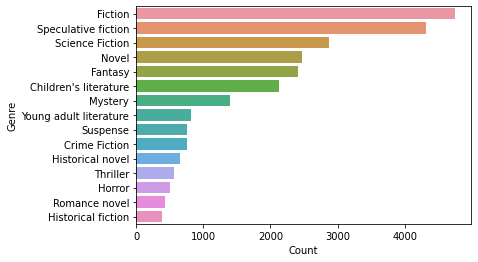

In [19]:
import matplotlib.pyplot as plt 
import seaborn as sns

g = all_genres_df.nlargest(columns="Count", n = 15) 
plt.figure() 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Genre') 
plt.show()

In [20]:
all_genres_df = all_genres_df.to_dict()

In [21]:
low_freq = []
for i in range(len(all_genres_df['Count'])):
    if all_genres_df['Count'][i] <= 50:
        low_freq.append(all_genres_df['Genre'][i])


In [22]:
len(low_freq)

189

In [23]:
df = df.reset_index(drop=True)

In [24]:
df.head()

,Title,Genres,Summary
0,Animal Farm,"[Roman à clef, Satire, Children's literature, ...","Old Major, the old boar on the Manor Farm, ca..."
1,A Clockwork Orange,"[Science Fiction, Novella, Speculative fiction...","Alex, a teenager living in near-future Englan..."
2,The Plague,"[Existentialism, Fiction, Absurdist fiction, N...",The text of The Plague is divided into five p...
3,A Fire Upon the Deep,"[Hard science fiction, Science Fiction, Specul...",The novel posits that space around the Milky ...
4,All Quiet on the Western Front,"[War novel, Roman à clef]","The book tells the story of Paul Bäumer, a Ge..."


In [25]:
index_delete = []
for word in low_freq:
    for i in range(len(df.Genres)):
        if word in df.Genres[i]:
            if i not in index_delete:
                index_delete.append(i)        

In [26]:
df.drop(index_delete , inplace=True)

In [27]:
df.shape

(11283, 3)

In [28]:
df.head()

,Title,Genres,Summary
1,A Clockwork Orange,"[Science Fiction, Novella, Speculative fiction...","Alex, a teenager living in near-future Englan..."
6,Blade Runner 3: Replicant Night,"[Science Fiction, Speculative fiction]","Living on Mars, Deckard is acting as a consul..."
7,Blade Runner 2: The Edge of Human,"[Science Fiction, Speculative fiction]",Beginning several months after the events in ...
9,Crash,"[Speculative fiction, Fiction, Novel]",The story is told through the eyes of narrato...
10,Children of Dune,"[Science Fiction, Speculative fiction, Childre...",Nine years after Emperor Paul Muad'dib walked...


In [29]:
df = df.reset_index(drop=True)

In [30]:
# Create new list for genres
genres = []

# extract genres
for i in range(len(df['Genres'])): 
  genres.append(df['Genres'][i]) 

In [31]:
# get all genre tags in a list

all_genres = sum(genres,[])
len(set(all_genres))

38

In [32]:
import nltk
all_genres = nltk.FreqDist(all_genres) 

# create dataframe
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})

In [33]:
all_genres_df.head()

,Genre,Count
0,Science Fiction,2615
1,Novella,73
2,Speculative fiction,3893
3,Utopian and dystopian fiction,52
4,Satire,82


In [34]:
all_genres_df = all_genres_df.sort_values(by='Count', ascending = False)
all_genres_df = all_genres_df.reset_index(drop=True)

In [35]:
df.Summary[0][:300]

' Alex, a teenager living in near-future England, leads his gang on nightly orgies of opportunistic, random "ultra-violence." Alex\'s friends ("droogs" in the novel\'s Anglo-Russian slang, Nadsat) are: Dim, a slow-witted bruiser who is the gang\'s muscle; Georgie, an ambitious second-in-command; and Pet'

In [36]:
from nltk.corpus import stopwords
def clean_text(text):
    
    # change all letters to lower case
    text = text.lower()
    
    # remove all numbers from text
    text = re.sub(r'\d+', '', text)
    
    # remove all white spaces from text
    text = text.strip()
    
    # remove all punctuation from text
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    return text

In [37]:
import string
df['Summary'] = df['Summary'].apply(lambda x: clean_text(x))

In [38]:
df.Summary[0][:300]

'alex a teenager living in nearfuture england leads his gang on nightly orgies of opportunistic random ultraviolence alexs friends droogs in the novels anglorussian slang nadsat are dim a slowwitted bruiser who is the gangs muscle georgie an ambitious secondincommand and pete who mostly plays along a'

In [39]:
word_freq = df.Summary.str.split(expand=True).stack().value_counts().rename_axis('Word').reset_index(name='Frequency')

In [40]:
word_freq.head()

,Word,Frequency
0,the,341480
1,to,173240
2,and,165964
3,of,133069
4,a,127906


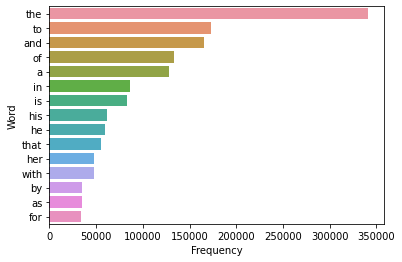

In [41]:
g = word_freq.nlargest(columns="Frequency", n = 15) 
plt.figure() 
ax = sns.barplot(data=g, x= "Frequency", y = "Word") 
ax.set(ylabel = 'Word') 
plt.show()

In [42]:
from nltk.tokenize import word_tokenize

def remove_stopwords(text):
    # cache stopwords to run faster
    cachedStopWords = stopwords.words("english")   
    
    text_tokens = word_tokenize(text)
    
    # remove all stopwords
    text = [word for word in text_tokens if word not in cachedStopWords]
    text = ' '.join(text)
    
    return text

df['Summary'] = df['Summary'].apply(lambda x: remove_stopwords(x))

In [43]:
df.Summary[0][:300]

'alex teenager living nearfuture england leads gang nightly orgies opportunistic random ultraviolence alexs friends droogs novels anglorussian slang nadsat dim slowwitted bruiser gangs muscle georgie ambitious secondincommand pete mostly plays along droogs indulge taste ultraviolence characterized so'

In [44]:
new_word_freq = df.Summary.str.split(expand=True).stack().value_counts().rename_axis('Word').reset_index(name='Frequency')

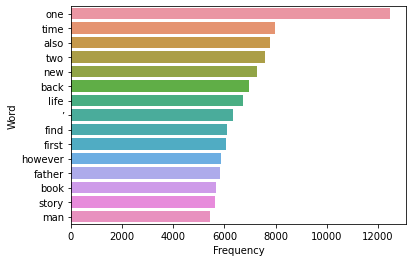

In [45]:
g = new_word_freq.nlargest(columns="Frequency", n = 15) 
plt.figure() 
ax = sns.barplot(data=g, x= "Frequency", y = "Word") 
ax.set(ylabel = 'Word') 
plt.show()

In [46]:
df.to_csv('data/clean_data.csv', index = False)

In [47]:
new_word_freq.shape

(120376, 2)

In [48]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(df['Genres'])

# transform target variable
y = multilabel_binarizer.transform(df['Genres'])

In [49]:
y[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [50]:
all_genres_df['Count'][0]/len(df.Genres) # No. Fiction books / All books

0.3714437649561287

In [51]:
from sklearn.model_selection import train_test_split

# split data in train and test set:
x_train, x_test, y_train, y_test = train_test_split(df['Summary'], y, test_size=0.2, random_state=1)

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=8000)

# create TF-IDF features

x_train_vec = tfidf_vectorizer.fit_transform(x_train)
x_test_vec = tfidf_vectorizer.transform(x_test)

In [54]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score

from sklearn.ensemble import RandomForestClassifier
rd = RandomForestClassifier()
clf = OneVsRestClassifier(rd)

# fit model on train data

clf.fit(x_train_vec, y_train)

# make predictions for validation set
y_pred = clf.predict(x_test_vec)

print('f1 score (RD): ', f1_score(y_test, y_pred, average="micro"))

f1 score (RD):  0.3200251493241119


In [55]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

# fit model on train data

clf.fit(x_train_vec, y_train)

# make predictions for validation set
y_pred = clf.predict(x_test_vec)

print('f1 score (LR): ',f1_score(y_test, y_pred, average="micro"))

f1 score (LR):  0.3845584972637183


In [56]:
# predict probabilities
y_pred_prob = clf.predict_proba(x_test_vec)

# change threshhold value 
t = 0.3 
y_pred_new = (y_pred_prob >= t).astype(int)

In [57]:
# evaluate performance
print('f1 score (LR with 0.3 threshhold): ', f1_score(y_test, y_pred_new, average="micro"))

f1 score (LR with 0.3 threshhold):  0.5607050285121825


In [58]:
multilabel_binarizer.inverse_transform(y_pred_new)[0]

('Fiction', 'Science Fiction', 'Speculative fiction')

In [59]:
multilabel_binarizer.inverse_transform(y)[0]

('Fiction',
 'Novella',
 'Satire',
 'Science Fiction',
 'Speculative fiction',
 'Utopian and dystopian fiction')